<font size="5">**Finding the Influence of Maximum Heart Rate and ST Depression on Heart Disease**</font>
<font size="3">*Prepared by Group 34: Felix Chan, Danielle De Martin, Avneet Kaur, Maggie Wang*</font>

<font size="3">**Introduction**</font>

The topic that we will be investigating is heart disease. The term “heart disease” refers to several types of heart conditions that affect the structure and the function of the heart, each with different root causes. Our analysis will not discriminate between the different types of heart disease, instead we will focus on the presence of heart diseases in general in correlation to attributes including maximum heart rate and ST depression induced by exercise relative to rest.

Based on research conducted, the main factors that contribute to heart disease were identified as high blood pressure, high low-density lipoprotein (LDL) cholesterol, diabetes, smoking, obesity, unhealthy diet and physical inactivity (2). Cholesterol is said to contribute to heart disease as high levels of cholesterol may lead to an individual developing fatty deposits in their blood vessels which would eventually grow large enough that they clog up arteries, obstructing the blood flow and creating a blood clot (4). Whereas, high blood pressure reduces the elasticity of an individual’s arteries, hence, reducing the flow of blood and oxygen to their heart, resulting in heart disease (6).  Further research also suggested that age itself doesn’t directly correlate to heart disease, however, there are associated conditions such as higher blood pressure or clogged up arteries that become more common at older ages. The severity of these conditions can be reduced or even avoided by leading a healthy lifestyle, hence, demonstrating that age doesn’t significantly contribute to heart disease (3). 

The dataset we will be using is from 1988 and contains 76 attributes in databases from patients in Cleveland, Hungary, Switzerland, and Long Beach V. However, all published experiments only use a subset of 14 attributes. To determine our research question, we selected the continuous variables from these 14 attributes, and then used data analysis to narrow down which variables appear to affect the presence of heart disease. The question we have decided to ask is: given an individual’s maximum heart rate and ST depression, do they have heart disease? ST depression refers to when the trace on an EKG is unusually below baseline (5). People diagnosed with heart disease are defined as having  >50% diameter narrowing in any of their major blood vessels, while people not diagnosed with heart disease are defined as having <50% diameter narrowing in any of their major blood vessels.


<font size="3">**Methods and Results**</font>

We first loaded all libraries pertaining and relevant for this data analysis.

In [58]:
# Loading all the required libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(patchwork)

Since the data was stored elsewhere, we used `read_csv` to import from the website and loaded the data onto our worksheet. We had also changed the the column headers of the data to headers that are more understandable. As the target variable was the variable to be classified from our analysis, we had used `as_factor` to differentiate the patient from having a heart disease, not to be confused with it being  a scale.

In [60]:
# Reading dataframe from the internet and storing it to a variable
url <- "https://raw.githubusercontent.com/maggie63/dsci-100-group-34/main/data/heart.csv"

column_headers <- c("age", "sex", "chest_pain", "resting_bp", "cholestoral", "fasting_bs", "resting_ecg", "max_hr", "exang", "st_depression", "slope_st", "vessel_num", "thal", "target") 


heart_disease <- read_csv(url, skip = 1, col_names = column_headers) |>
    mutate(target = as_factor(target))

# Printing the first few rows of the dataframe
head(heart_disease)

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, chest_pain, resting_bp, cholestoral, fasting_bs, resting...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,resting_bp,cholestoral,fasting_bs,resting_ecg,max_hr,exang,st_depression,slope_st,vessel_num,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


*Table 1.0: First few rows of "Heart Disease Data Set" with 1026 rows and 14 columns*

<font size="3">**Summarizing the Data**</font>

We first considered only the continuous variables from the heart disease dataset because we chose to use classification, leaving us with the following variables: age, resting_bp (resting blood pressure), cholestoral (cholesterol levels), max_hr (maximum heart rate achieved) and st_depression (ST depression induced by exercise relative to rest).

In [61]:
# Setting the seed
set.seed(1234)

# Splitting the data (75/25 training/testing split)
heart_split <- initial_split(heart_disease, prop = 0.75, strata = target)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

Based on our research we expected cholesterol level and blood pressure to have the greatest link to whether an individual has heart disease. However, apart from the secondary research we also wanted to conduct a statistical analysis to determine the final variables we would test with our hypothesis. We calculated the means of each of the variables in a table using the summarize function to see which variables showed the greatest difference between an individual that had heart disease and an individual that didn’t.

In [63]:
# Creating a summary table of variable means
summary <- c("age", "resting_bp", "cholestoral", "max_hr", "st_depression")
heart_summary <- heart_training |>
    group_by(target) |>
    summarise_at(vars(summary), mean, na.rm = TRUE) |>
    pivot_longer(-target, names_to = "variable", values_to = "mean")
heart_summary

target,variable,mean
<fct>,<chr>,<dbl>
0,age,56.5614973
0,resting_bp,133.8449198
0,cholestoral,251.1631016
0,max_hr,138.8101604
0,st_depression,1.6069519
1,age,51.7131980
1,resting_bp,129.0152284
1,cholestoral,238.8172589
1,max_hr,159.8045685


*Table1.1: Summary of selected variables and their means*

<font size="3">**Choosing the Predictors**</font>

We visualized the data from the table we created using the geom_boxplot function to make it easier to determine which variables appeared to be the greatest predictors of heart disease. Our analysis indicated that maximum heart rate and ST depression were the greatest predictor of heart disease so we updated our heart disease data frame to only select our chosen predictor variables and the response variable for our convenience as we proceeded to do the rest of our analysis. We also used both the mutate function and the `as_factor` function to ensure that jupyter notebook recognized that our response variable was a categorical variable.

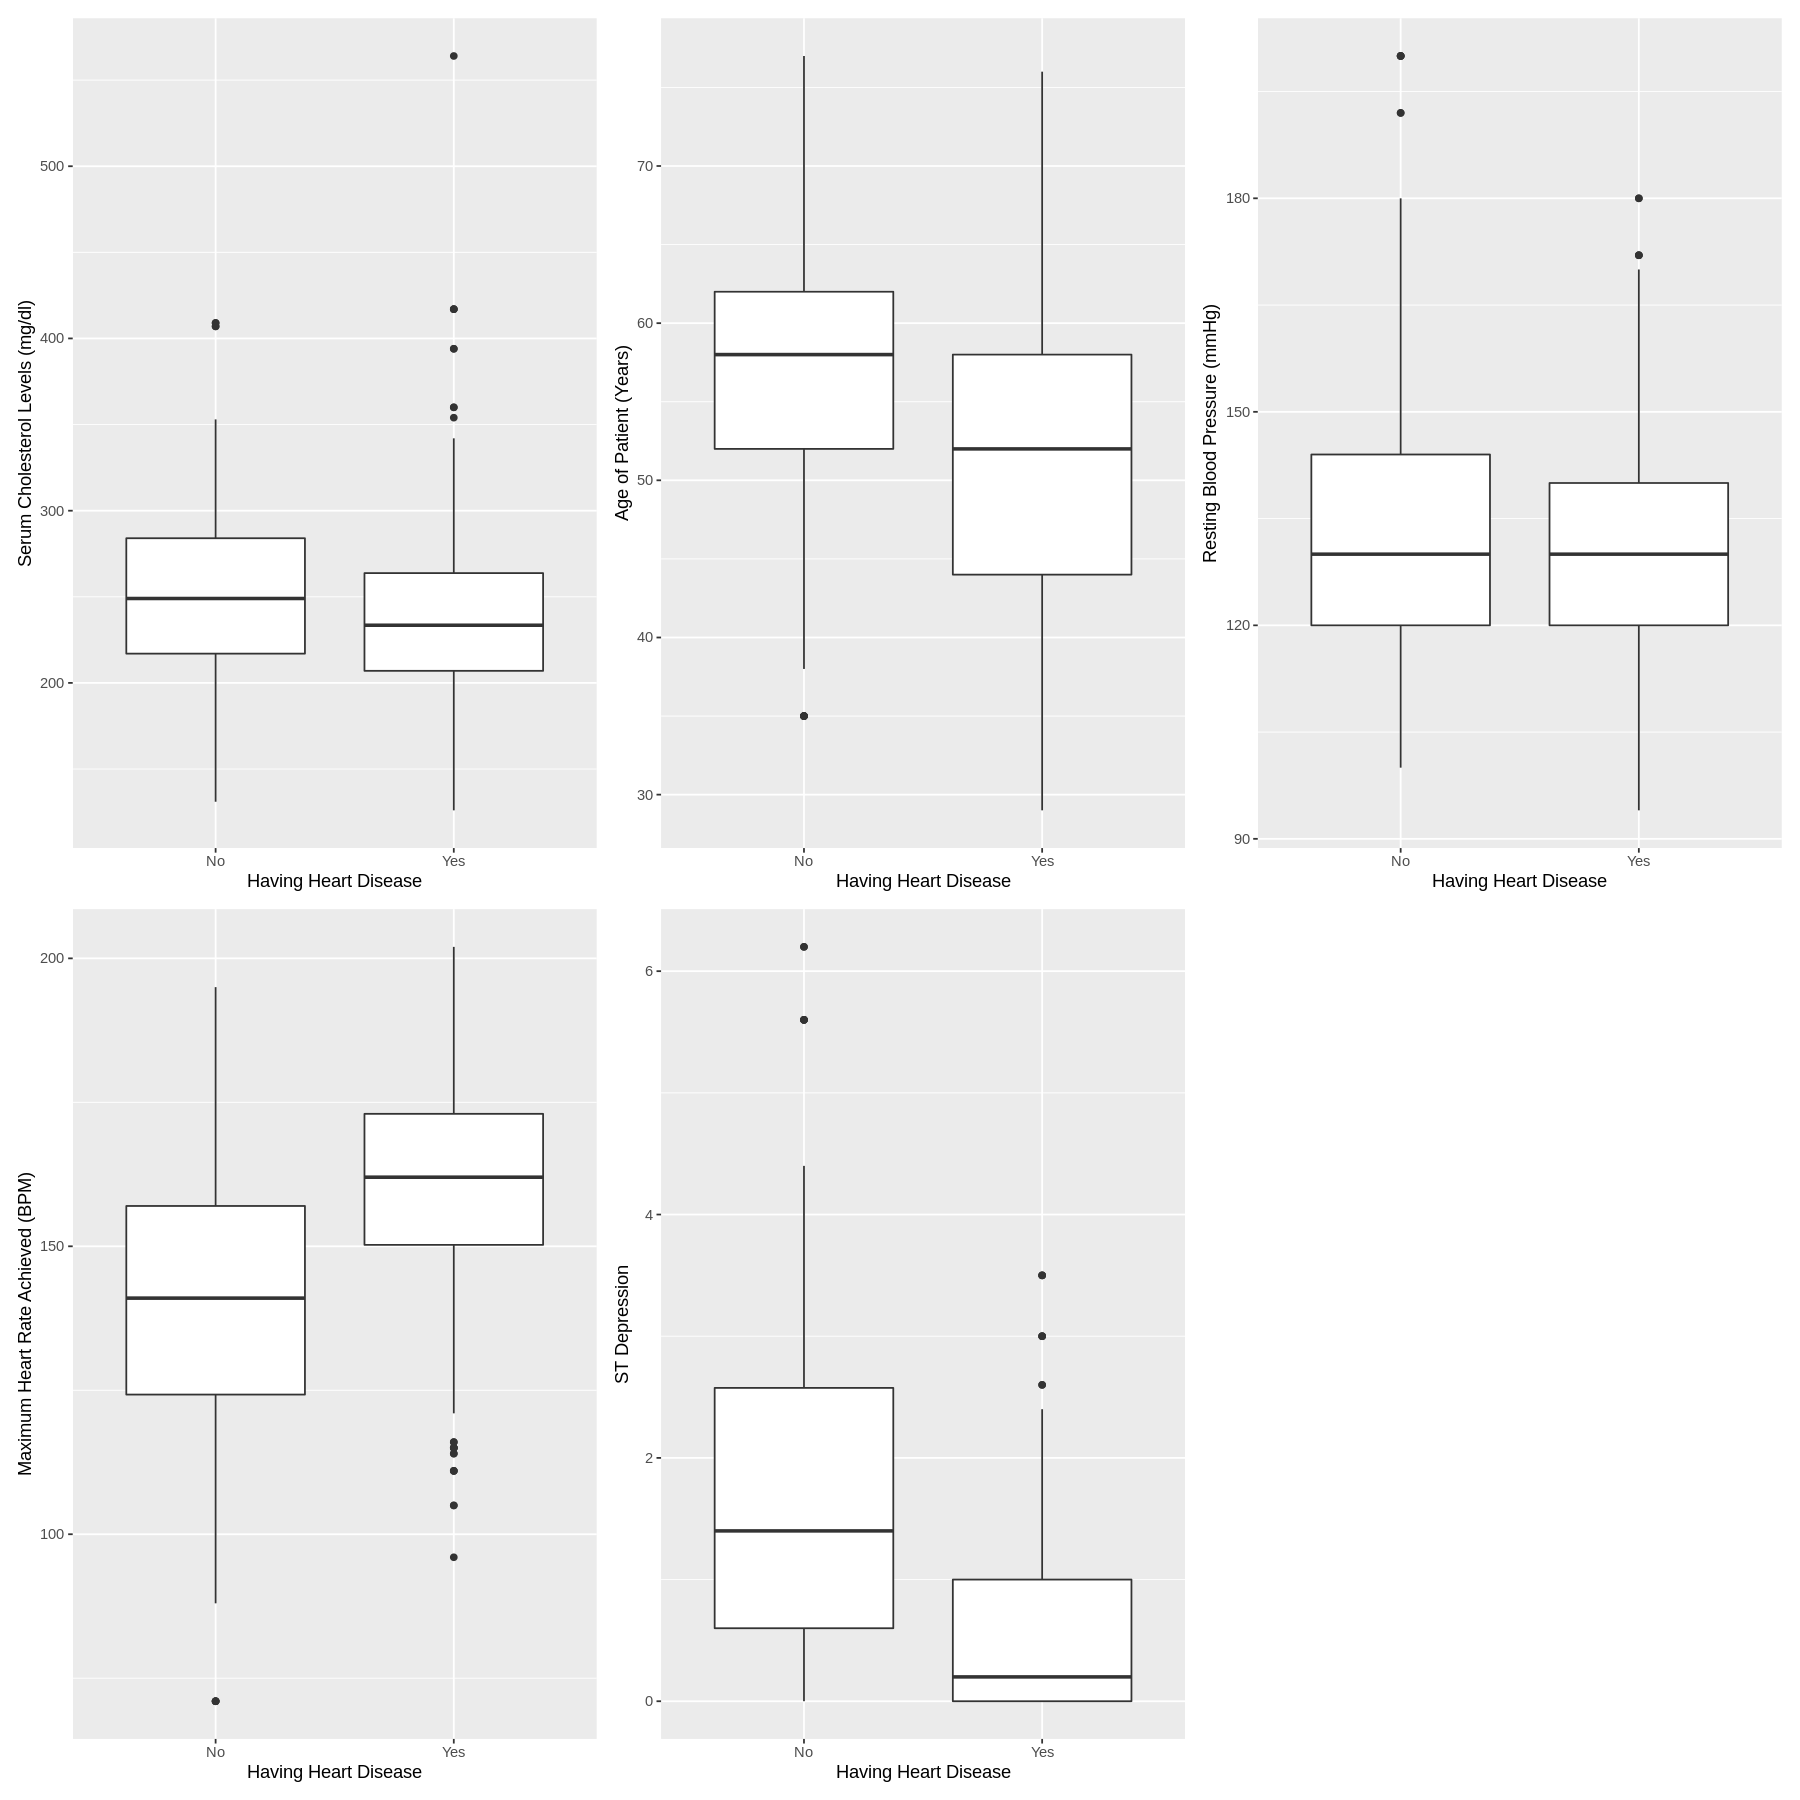

In [64]:
options(repr.plot.width = 15, repr.plot.height = 15) 

# Creating boxplots to compare variable means
heart_plot_chol <- heart_training |>
    ggplot(aes(x = as_factor(target), y = cholestoral)) +
    geom_boxplot() +
    labs(x = "Having Heart Disease", y = "Serum Cholesterol Levels (mg/dl)") +
    scale_x_discrete(labels = c("No", "Yes"))

heart_plot_age <- heart_training |>
    ggplot(aes(x = as_factor(target), y = age)) +
    geom_boxplot() +
    labs(x = "Having Heart Disease", y = "Age of Patient (Years)") +
    scale_x_discrete(labels = c("No", "Yes"))

heart_plot_bps <- heart_training |>
    ggplot(aes(x = as_factor(target), y = resting_bp)) +
    geom_boxplot() +
    labs(x = "Having Heart Disease", y = "Resting Blood Pressure (mmHg)") +
    scale_x_discrete(labels = c("No", "Yes"))

heart_plot_max <- heart_training |>
    ggplot(aes(x = as_factor(target), y = max_hr)) +
    geom_boxplot() +
    labs(x = "Having Heart Disease", y = "Maximum Heart Rate Achieved (BPM)") +
    scale_x_discrete(labels = c("No", "Yes"))

heart_plot_st <- heart_training |>
    ggplot(aes(x = as_factor(target), y = st_depression)) +
    geom_boxplot() +
    labs(x = "Having Heart Disease", y = "ST Depression") +
    scale_x_discrete(labels = c("No", "Yes"))

# Combining individual plots into one big plot
heart_plot <- heart_plot_chol + heart_plot_age + heart_plot_bps + heart_plot_max + heart_plot_st + plot_layout(ncol = 3)
heart_plot

*Graph 1.2: Comparison of box plots when different variables were plotted against `target`*

Before splitting our data we used the set_seed function to ensure that we got the same results for randomization. Next, we decided to split 75% of our data into a training subset and the remaining 25% was allocated into a testing subset. We chose this split using `inital_split` to ensure that we had enough data to train our model and produce a higher level of accuracy while still having adequate data left to test its validity. Then the initial split was then seperated into a training set and testing set using `training` and `testing`.

In [65]:
# Setting the seed
set.seed(1234)

# Selecting only target variables from data frame
heart_disease_final <- heart_disease |> select(target, max_hr, st_depression)

# Splitting the data (75/25 training/testing split)
heart_split_final <- initial_split(heart_disease_final, prop = 0.75, strata = target)
heart_training_final <- training(heart_split_final)
heart_testing_final <- testing(heart_split_final)

We used the k-nearest neighbors classification algorithm with the tune function, since we were unsure of what value of K would provide us with the best results. We also made sure that we scaled and centered our data so that a big difference in the ranges of our data would not affect the validity of our findings, this was especially important as our chosen algorithm relies on analysing based on the distance between points. We also used the `vfold_cv` function in order to conduct a 5 fold cross validation so that we could compare the classifier’s performance and pick the best value of K. Following this, we organized all of these functions together into a workflow called `knn_results`. We then filtered it for accuracy and plotted our result to find the value of K that produced the results with the greatest level of accuracy. 

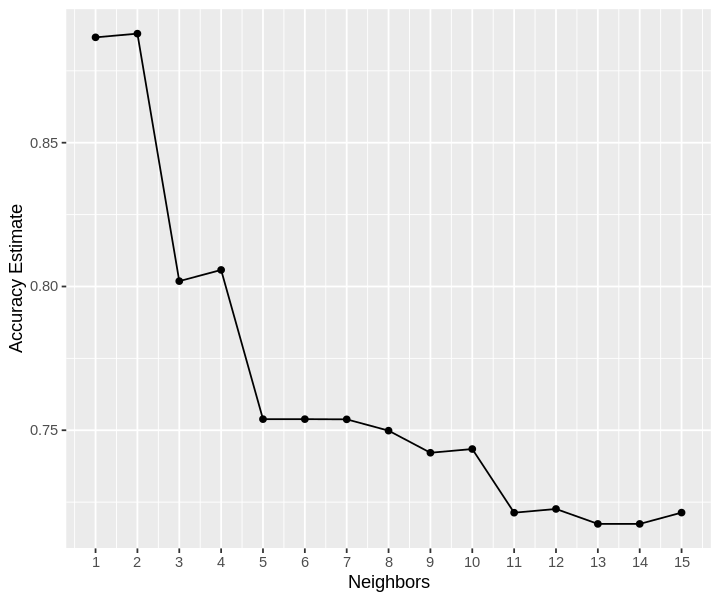

In [66]:
# Setting up
set.seed(1234) 
options(repr.plot.height = 5, repr.plot.width = 6)

# Creating a model specification with tuning on the number of neighbours
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

# Recipe uses max_hr and st_depression to predict target - no heart disease (0), heart disease (1)
recipe <- recipe(target ~ max_hr + st_depression, data = heart_training_final) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Testing k values from 1 to 10
k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

# Performing a 5-fold cross-validation on the training set
vfold <- vfold_cv(heart_training_final, v = 5, strata = target)

# Creating a workflow analysis with recipe and model specification and collecting metrics
knn_results <- workflow() |>
      add_recipe(recipe) |>
      add_model(knn_spec) |>
      tune_grid(resamples = vfold, grid = k_vals) |>
      collect_metrics()

# Collecting the accuracies from the workflow analysis
accuracies <- knn_results |> 
      filter(.metric == "accuracy")

# Plotting k vs accuracy
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      scale_x_continuous(breaks = seq(0, 15, by = 1)) +  # adjusting the x-axis
      labs(x = "Neighbors", y = "Accuracy Estimate")
cross_val_plot

*Graph 2.0: Plot of Accuracy Estimates vs Neighbors (K values)*

Based on our plot we performed the k nearest neighbor classification algorithm once again, this time using K=2. We then used the predict function to test the accuracy of our model with the testing data set. Finally, we used the metric function to calculate the accuracy of our model and created a confusion matrix in order to observe how many predictions were classified correctly. 

In [67]:
# Creating a final model using k = 2
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
        set_engine("kknn") |>
        set_mode("classification")
final_fit <- workflow() |>
      add_recipe(recipe) |>
      add_model(final_spec) |>
      fit(data = heart_training_final)

# Using model to predict on testing dataset
heart_predictions <- predict(final_fit , heart_testing_final) |>
      bind_cols(heart_testing_final)
head(heart_predictions)

# Accuracy of prediction
heart_metrics <- heart_predictions |>
        metrics(truth = target, estimate = .pred_class) |>
        filter(.metric == "accuracy")
heart_metrics

#Creating a confusion matrix
heart_conf_mat <- heart_predictions |> 
      conf_mat(truth = target, estimate = .pred_class)
heart_conf_mat

.pred_class,target,max_hr,st_depression
<fct>,<fct>,<dbl>,<dbl>
0,0,168,1.0
0,0,106,1.9
0,0,145,0.8
0,0,144,0.8
0,0,116,3.2
0,0,122,4.2


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8871595


          Truth
Prediction   0   1
         0 125  29
         1   0 103

*Table 2.0: A first few rows of a tibble showning the `.pred_class` and comparing to the actual `target`.
Table 2.1: Depicts the accuracy of the `.pred_class` to the actual `target`.
Table 2.2: Accuracy Matrix showing the predictions and the truth*

Now that we were done with the actual analysis, we used the ggplot function to create a scatter graph that compared maximum heart rate achieved on the x axis and ST depression on the y axis. We colored our points to differentiate which individuals had heart disease and which didn’t to make it easy to visually separate what levels of ST depression and maximum heart rate achieved would indicate heart disease.

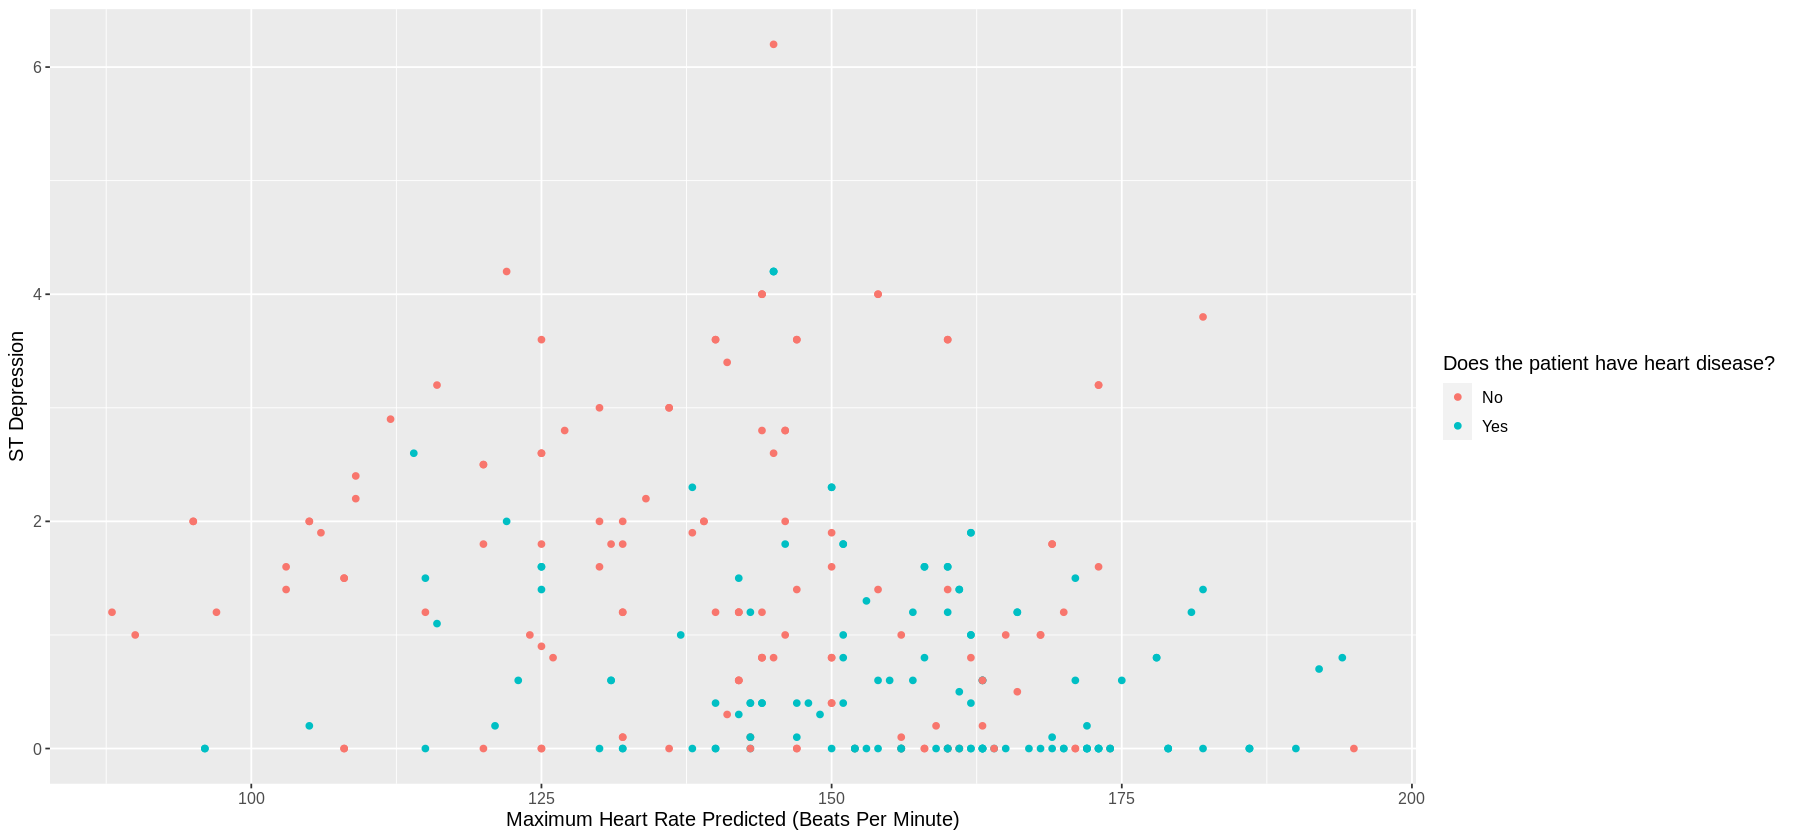

In [69]:
options(repr.plot.width = 15, repr.plot.height = 7)

#Visualize the data analysis
final_plot_max_heartrate <- ggplot(heart_predictions, aes(x = max_hr, y = st_depression, color = target)) +
  geom_point() +
  labs(x = "Maximum Heart Rate Predicted (Beats Per Minute)", 
       y = "ST Depression", 
       color = "Does the patient have heart disease?") + 
  scale_colour_discrete(labels = c("0" = "No", "1" = "Yes")) +
  theme(text = element_text(size = 12))
final_plot_max_heartrate

*Graph 2.1: ST Depression versus Maximum Heart Rate, categorized by having heart disease*

<font size="4">**Discussion**</font>

<font size="2">**Summary**</font>

From the analysis that we had performed above, using the `heart_testing_final` as the testing set, we were able to achieve an accuracy of approximately 88.7%. Statistically speaking, the classifier that we have tuned using Knn-classification has achieved significantly high accuracy, however, in the medical, an inaccuracy of even 12% can mean life or death. 

This accuracy was achieved using the variables `max_hr` and `st_depression`, depicting the maximum heart rate achieved by the patient and the ST depression measured by electrocardiograms during the S and T segments. As shown by *Graph 1.2*, these were the only two variables that had a visible relationship with having heart disease or not (`target`). Next, we performed cross-validation using the `vfold_cv` function to ensure a more structured split and not rely on only one set of training data. Upon performing cross-validation and finding the most optimal nearest neighbour, the value for K=2 was found. As shown in *Graph 2.0*, the highest point of the line graph was seen at neighbours=2. This indicates to us that a classifier with nearest-neighbour 2 would have the highest accuracy. 

Upon selecting k=2 we performed our predictions on the testing set with a known `target`, using `heart_training_final` and its recipes we were able to an accuracy of 88.7%. Additionally, we also produced an accuracy matrix depicting the number of correctly predicted versus wrongly predicted. As shown by *Table 2.2*, there were 125 cases where the classifiers accurately classified the patient as not having any heart disease, 0 cases where it had predicted of falsely having heart disease, 103 cases where the classifier accurately classified a patient with heart disease, and finally 29 cases of falsely predicting a patient without having any heart disease. The last case is however the most important since it is where this could mean life or death for the patient. The classifier would become problematic if it diagnoses the patient as being healthy, even though the patient has heart disease. Although the classifier was 88.7% accurate, the remaining 11.3% were all falsely classified as healthy patients. If it had been the other way around, where a patient is falsely classified as having heart disease, the other diagnosis can be done to confirm the diagnosis. However, in this case, classifying the patient as not having heart disease may prompt medical professionals to skip the procedure of doing extra tests, indicating a major flaw in our classifier.

<font size="2">**Outcomes and its Signficance**</font>

As expected, combining two variables that already had a visible relationship with `target`, would cause a high accuracy in our classifier. However, in most of the exercises that we have done on Knn-classification, we had expected a higher K-value since a K-value of 2 may indicate overfitting. However, upon reviewing our code and graphs, we have determined that with the dataset that was given, a K-value of 2 was understandable. Illustrated by *Graph 2.1*, we can see that the categories of `target` were more commonly clustered together in groups. The predicted graph also followed the trends of the box plots from *Graph 1.2* were patients with a lower SD depression (commonly seen as having a weaker heartbeat) as having heart disease. Similarly, patients with a higher maximum heart rate achieved were also more prone to having heart disease. This is somewhat depicted by *Graph 2.1* as a larger cluster can be seen at the bottom right of the graph, indicating high heart rate and low SD depression. According to Perret-Guillaume 2009, an increase in heart rate of at least 10%, indicates an increase in the risk of death by cardiac arrest by at least 20%, which correlates with our graph.

<font size="2">**Impact of these findings**</font>

The classifier that we built had an overall accuracy of 88.7% in 257 cases. This can be used by professionals in the medical field to be used as a tool to predict if a patient exhibits heart disease symptoms based on `max_hr` and `st_depression`. Although the error that we have encountered in classifications is the most problematic one, where patients are falsely classified as healthy, this does not stop doctors from first making a prediction. We would then suggest continuing with further tests to ensure the diagnosis. *Graph 2.1* only illustrates 257 patients, where we may not see a very clear trend, however, if we had increased the test set by larger amounts, we would then see a larger cluster in the bottom right of the graph. That being said, our findings can prompt further analysis teams to begin more extensive research on heart disease and the predictors `max_hr` and `st_depression` with a larger test set.

<font size="2">**Further Questions**</font>

- Apart from these clear predictors, what other less common variables may contribute to having heart disease?
- What are the symptoms correlated with a high maximum heart rate achieved and a low ST depression?
- Why is having high cholesterol not correlated with having heart disease, despite?
- How we can use classifiers to predict other diseases such as cancer?

<font size="4">**References**</font>

1) Types of heart disease. Heart and Stroke Foundation of Canada. (n.d.). https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/types-of-heart-disease

2) Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm

3) U.S. Department of Health and Human Services. (n.d.). Heart health and aging. National Institute on Aging. https://www.nia.nih.gov/health/heart-health-and-aging 

4) Mayo Foundation for Medical Education and Research. (2023, January 11). High cholesterol. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800

5) MediLexicon International. (n.d.). St segment depression: Definition, causes, treatments. Medical News Today. https://www.medicalnewstoday.com/articles/st-segment-depression#causes

6) Centers for Disease Control and Prevention. (2021, May 18). High blood pressure symptoms and causes. Centers for Disease Control and Prevention. https://www.cdc.gov/bloodpressure/about.htm

7) Janosi, A., Detrano, R., Pfisterer, M., & Steinbrunn, W. (n.d.). Heart disease. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease 

8) A;, P.-G. C. L. (n.d.). Heart rate as a risk factor for cardiovascular disease. Progress in cardiovascular diseases. https://pubmed.ncbi.nlm.nih.gov/19615487/#:~:text=It%20has%20been%20shown%20that,pressure%20by%2010%20mm%20Hg. 